# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1065]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [1067]:
path = r'C:\Users\lucas\Documents\Mod_9\SINASC_RO_2019.csv'

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1070]:
sinasc_raw = pd.read_csv(path)
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [1074]:
sinasc_raw['APGAR1'].dtypes

dtype('float64')

In [1076]:
sinasc_2 = sinasc_raw[['munResLat', 'munResArea', 'munResAlt']]

In [1078]:
latitude = pd.cut(sinasc_2['munResLat'], [-13.49976,-10.5, -8.76889])
latitude

0        (-13.5, -10.5]
1        (-13.5, -10.5]
2        (-13.5, -10.5]
3        (-13.5, -10.5]
4        (-13.5, -10.5]
              ...      
27023    (-13.5, -10.5]
27024    (-13.5, -10.5]
27025    (-13.5, -10.5]
27026    (-13.5, -10.5]
27027    (-13.5, -10.5]
Name: munResLat, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(-13.5, -10.5] < (-10.5, -8.769]]

In [1080]:
result = sinasc_2.groupby(latitude).agg({
    'munResAlt': ['sum', 
                  'mean', 
                  'min', 
                  'max', 
                  'median', 
                  'std',
                  'var'
                  ],
    'munResArea': ['sum', 
                  'mean', 
                  'min', 
                  'max', 
                  'median', 
                  'std',
                  'var'
                  ],
})

result

C:\Users\lucas\AppData\Local\Temp\ipykernel_24580\3379228058.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = sinasc_2.groupby(latitude).agg({


munResAlt                                               \
                       sum        mean    min    max median         std   
munResLat                                                                 
(-13.5, -10.5]   3291565.0  254.903198  133.0  595.0  191.0  140.196000   
(-10.5, -8.769]  1530415.0  109.050520   85.0  192.0   87.0   30.071422   

                                 munResArea                                    \
                          var           sum          mean      min        max   
munResLat                                                                       
(-13.5, -10.5]   19654.918293  8.349629e+07   6466.064131  459.978  24855.724   
(-10.5, -8.769]    904.290400  3.137711e+08  22357.926110  965.676  34096.394   

                                                        
                    median           std           var  
munResLat                                               
(-13.5, -10.5]    5067.384   5692.080934  3.239979e+07  
(-10.5, -8.769]  34096.394  14488.909375  2.099285e+08

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [1083]:
sinasc_3 = sinasc_raw[['APGAR5', 'munResArea', 'APGAR1']]

In [1085]:
sinasc_3['munResArea'].sort_values()

5469       459.978
17881      459.978
19133      459.978
5385       459.978
17832      459.978
           ...    
7348     34096.394
20069    34096.394
7342     34096.394
20709    34096.394
1863           NaN
Name: munResArea, Length: 27028, dtype: float64

In [1087]:
area = pd.cut(sinasc_3['munResArea'], [0, 3000, 34096.394])
area

0        (3000.0, 34096.394]
1        (3000.0, 34096.394]
2        (3000.0, 34096.394]
3        (3000.0, 34096.394]
4        (3000.0, 34096.394]
                ...         
27023    (3000.0, 34096.394]
27024    (3000.0, 34096.394]
27025    (3000.0, 34096.394]
27026    (3000.0, 34096.394]
27027          (0.0, 3000.0]
Name: munResArea, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(0.0, 3000.0] < (3000.0, 34096.394]]

In [1089]:
result_2 = sinasc_3.groupby(area).agg({
    'APGAR5': ['sum', 
                  'mean', 
                  'min', 
                  'max', 
                  'median', 
                  'std',
                  'var'
                  ],
    'APGAR1': ['sum', 
                  'mean', 
                  'min', 
                  'max', 
                  'median', 
                  'std',
                  'var'
                  ],
})

result_2

C:\Users\lucas\AppData\Local\Temp\ipykernel_24580\1146351069.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_2 = sinasc_3.groupby(area).agg({


APGAR5                                                  \
                          sum      mean  min   max median       std       var   
munResArea                                                                      
(0.0, 3000.0]         47560.0  9.130351  0.0  10.0    9.0  0.801124  0.641799   
(3000.0, 34096.394]  199579.0  9.190836  0.0  10.0    9.0  0.787591  0.620299   

                       APGAR1                                                  
                          sum      mean  min   max median       std       var  
munResArea                                                                     
(0.0, 3000.0]         42070.0  8.073306  0.0  10.0    8.0  1.008790  1.017658  
(3000.0, 34096.394]  177079.0  8.152808  0.0  10.0    8.0  0.978517  0.957495

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [1092]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [1094]:
sinasc_3 = sinasc_raw[['munResAlt', 'CONSULTAS', 'QTDPARTNOR']]

In [1096]:
sinasc_3['munResAlt'].sort_values()

7521      85.0
8786      85.0
23937     85.0
10277     85.0
10275     85.0
         ...  
25794    595.0
25793    595.0
25807    595.0
11557    595.0
1863       NaN
Name: munResAlt, Length: 27028, dtype: float64

In [1098]:
altitude = pd.qcut(sinasc_3['munResAlt'], 2)
altitude

0        (153.0, 595.0]
1        (153.0, 595.0]
2        (153.0, 595.0]
3        (153.0, 595.0]
4        (153.0, 595.0]
              ...      
27023    (153.0, 595.0]
27024    (153.0, 595.0]
27025    (153.0, 595.0]
27026    (153.0, 595.0]
27027    (153.0, 595.0]
Name: munResAlt, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(84.999, 153.0] < (153.0, 595.0]]

In [1100]:
result_3 = sinasc_3.groupby(altitude).agg({
    'CONSULTAS': ['sum', 
                  'mean', 
                  'min', 
                  'max', 
                  'median', 
                  'std',
                  'var'
                  ],
    'QTDPARTNOR': ['sum', 
                  'mean', 
                  'min', 
                  'max', 
                  'median', 
                  'std',
                  'var'
                  ],
})

result_3

C:\Users\lucas\AppData\Local\Temp\ipykernel_24580\3896222965.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_3 = sinasc_3.groupby(altitude).agg({


CONSULTAS                                               \
                      sum      mean min max median       std       var   
munResAlt                                                                
(84.999, 153.0]     46579  3.419395   1   9    4.0  0.910623  0.829234   
(153.0, 595.0]      50083  3.736143   1   9    4.0  0.599894  0.359873   

                QTDPARTNOR                                                  
                       sum      mean  min   max median       std       var  
munResAlt                                                                   
(84.999, 153.0]     9307.0  0.780527  0.0  40.0    0.0  1.362645  1.856801  
(153.0, 595.0]      5264.0  0.398064  0.0  41.0    0.0  1.018270  1.036874

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [1103]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [1105]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [1107]:
sinasc_4 = sinasc_raw[['IDADEMAE', 'DTNASC', 'munResNome']]

In [1109]:
sinasc_4['REGIAO'] = sinasc_4['munResNome'].map(imediatas)

C:\Users\lucas\AppData\Local\Temp\ipykernel_24580\424057382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_4['REGIAO'] = sinasc_4['munResNome'].map(imediatas)


In [1111]:
idade_media = sinasc_4.groupby(['REGIAO', 'DTNASC'])['IDADEMAE'].mean().reset_index()

In [1113]:
plt.figure(figsize=[10, 6])
for regiao in idade_media['REGIAO'].unique():
    dados_regiao = idade_media[idade_media['REGIAO'] == regiao]
    plt.plot(dados_regiao['DTNASC'], dados_regiao['IDADEMAE'], label=regiao)

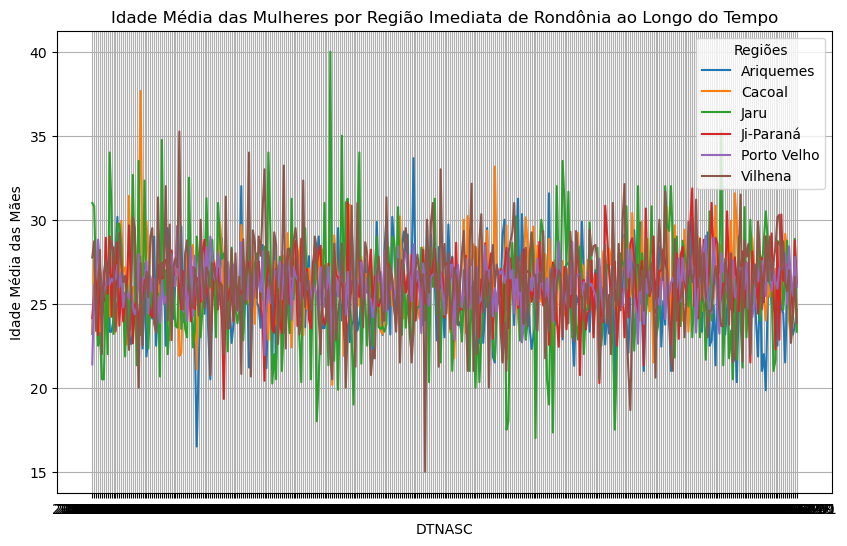

In [1114]:
plt.title('Idade Média das Mulheres por Região Imediata de Rondônia ao Longo do Tempo')
plt.xlabel('DTNASC')
plt.ylabel('Idade Média das Mães')
plt.legend(title="Regiões")

plt.grid(True)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [1117]:
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"

In [1118]:
tables = pd.read_html(url)
idh_table = tables[0]

In [1120]:
idh_table.columns = ['Posição', 'Município', 'IDH', 'IDH_Renda', 'IDH_Longevidade', 'IDH_Educação']

In [1121]:
idh_table = idh_table[['Posição', 'Município', 'IDH']].copy()

In [1122]:
idh_table.loc[:, 'IDH'] = pd.to_numeric(idh_table['IDH'], errors='coerce')

In [1137]:
idh_table.dropna(subset=['IDH'], inplace=True)

In [1139]:
def categorize_idh(idh):
   if idh <= 0.500:
       return "Muito Baixo"
   elif idh <= 0.600:
       return "Baixo"
   elif idh <= 0.700:
       return "Médio"
   elif idh <= 0.800:
       return "Alto"
   else:
       return "Muito Alto"

In [1141]:
idh_table.loc[:, 'Faixa_IDH'] = idh_table['IDH'].apply(categorize_idh)

In [1143]:
idh_table_classificado = idh_table[['Município', 'IDH', 'Faixa_IDH']]
idh_table_classificado.head()

,Município,IDH,Faixa_IDH
2,Porto Velho,0.736,Alto
3,Vilhena,0.731,Alto
4,Cacoal,0.718,Alto
5,Ji-Paraná,0.714,Alto
6,Pimenta Bueno,0.71,Alto


In [1145]:
idh_table_classificado.groupby('Faixa_IDH').agg({'Município': ['count'], 'IDH': ['mean']})

,Município,IDH
,count,mean
Faixa_IDH,,
Alto,6,0.7185
Baixo,9,0.591333
Médio,37,0.644784


In [1147]:
sinasc_4.head()

,IDADEMAE,DTNASC,munResNome,REGIAO
0,19,2019-02-19,Alta Floresta D'Oeste,Cacoal
1,29,2019-02-21,Alta Floresta D'Oeste,Cacoal
2,37,2019-02-25,Alta Floresta D'Oeste,Cacoal
3,30,2019-03-20,Alto Alegre dos Parecis,Cacoal
4,30,2019-03-23,Alta Floresta D'Oeste,Cacoal


In [1149]:
idh_table_classificado = idh_table_classificado.rename(columns={'Município': 'REGIAO'})
idh_table_classificado.head()

,REGIAO,IDH,Faixa_IDH
2,Porto Velho,0.736,Alto
3,Vilhena,0.731,Alto
4,Cacoal,0.718,Alto
5,Ji-Paraná,0.714,Alto
6,Pimenta Bueno,0.71,Alto


In [1151]:
sinasc_com_faixa_idh = pd.merge(sinasc_4, idh_table_classificado[['REGIAO', 'Faixa_IDH']], on='REGIAO', how='left')

In [1153]:
sinasc_com_faixa_idh.head()

,IDADEMAE,DTNASC,munResNome,REGIAO,Faixa_IDH
0,19,2019-02-19,Alta Floresta D'Oeste,Cacoal,Alto
1,29,2019-02-21,Alta Floresta D'Oeste,Cacoal,Alto
2,37,2019-02-25,Alta Floresta D'Oeste,Cacoal,Alto
3,30,2019-03-20,Alto Alegre dos Parecis,Cacoal,Alto
4,30,2019-03-23,Alta Floresta D'Oeste,Cacoal,Alto


In [1155]:
sinasc_com_faixa_idh.groupby('Faixa_IDH').agg({'IDADEMAE': ['mean'], 'DTNASC': ['count']})

,IDADEMAE,DTNASC
,mean,count
Faixa_IDH,,
Alto,26.119358,25344
Médio,25.708853,1683


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [1158]:
url_ifdm = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM"

In [1160]:
tables_ifdm = pd.read_html(url_ifdm)

In [1161]:
ifdm_table = tables_ifdm[0]

In [1162]:
ifdm_table.columns = ['Posição', 'Município', 'IFDM']

In [1163]:
ifdm_table.loc[:, 'IFDM'] = pd.to_numeric(ifdm_table['IFDM'], errors='coerce')

In [1168]:
ifdm_table.dropna(subset=['IFDM'], inplace=True)

In [1169]:
def categorize_ifdm(ifdm):
   if ifdm <= 0.4562:
       return "Muito Baixo"
   elif ifdm <= 0.5973:
       return "Regular"
   elif ifdm <= 0.7746:
       return "Moderado"
   else:
       return "Alto"

In [1172]:
ifdm_table.loc[:, 'Faixa_IFDM'] = ifdm_table['IFDM'].apply(categorize_ifdm)

In [1174]:
ifdm_table_classificado = ifdm_table[['Município', 'IFDM', 'Faixa_IFDM']]
ifdm_table_classificado.head()

,Município,IFDM,Faixa_IFDM
2,Ariquemes,0.7746,Moderado
3,Vilhena,0.7465,Moderado
4,Pimenta Bueno,0.7383,Moderado
5,Porto Velho,0.7257,Moderado
6,Ji-Paraná,0.7117,Moderado


In [1176]:
ifdm_table_classificado.groupby('Faixa_IFDM').agg({'Município': ['count'], 'IFDM': ['mean']})

,Município,IFDM
,count,mean
Faixa_IFDM,,
Moderado,26,0.659919
Muito Baixo,1,0.4562
Regular,25,0.560368


In [1178]:
ifdm_table_classificado = ifdm_table_classificado.rename(columns={'Município': 'REGIAO'})
ifdm_table_classificado.head()

,REGIAO,IFDM,Faixa_IFDM
2,Ariquemes,0.7746,Moderado
3,Vilhena,0.7465,Moderado
4,Pimenta Bueno,0.7383,Moderado
5,Porto Velho,0.7257,Moderado
6,Ji-Paraná,0.7117,Moderado


In [1180]:
sinasc_com_faixa_ifdm = pd.merge(sinasc_4, ifdm_table_classificado[['REGIAO', 'Faixa_IFDM']], on='REGIAO', how='left')
sinasc_com_faixa_ifdm.head()

,IDADEMAE,DTNASC,munResNome,REGIAO,Faixa_IFDM
0,19,2019-02-19,Alta Floresta D'Oeste,Cacoal,Moderado
1,29,2019-02-21,Alta Floresta D'Oeste,Cacoal,Moderado
2,37,2019-02-25,Alta Floresta D'Oeste,Cacoal,Moderado
3,30,2019-03-20,Alto Alegre dos Parecis,Cacoal,Moderado
4,30,2019-03-23,Alta Floresta D'Oeste,Cacoal,Moderado


In [1182]:
sinasc_com_faixa_ifdm.groupby('Faixa_IFDM').agg({'IDADEMAE': ['mean'], 'DTNASC': ['count']})

,IDADEMAE,DTNASC
,mean,count
Faixa_IFDM,,
Moderado,26.093795,27027


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [1185]:
url_PIB = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"

In [1187]:
table_pib = pd.read_html(url_PIB)

In [1188]:
pib_table = table_pib[0]

In [1189]:
pib_table.columns = ['Em 2019', 'Mudança (2014)', 'Município', 'PIB', 'Alteração']

In [1190]:
pib_table.dtypes

Em 2019             int64
Mudança (2014)     object
Município          object
PIB                object
Alteração         float64
dtype: object

In [1191]:
pib_table.head()

,Em 2019,Mudança (2014),Município,PIB,Alteração
0,1,(0),Porto Velho,17 912 070,NaN
1,2,(0),Ji-Paraná,3 783 972,NaN
2,3,(0),Vilhena,2 831 175,NaN
3,4,(0),Ariquemes,2 579 830,NaN
4,5,(0),Cacoal,2 261 644,NaN


In [1197]:
pib_table['PIB'] = pib_table['PIB'].str.replace(' ', '', regex=False)

In [1198]:
pib_table.loc[:, 'PIB'] = pd.to_numeric(pib_table['PIB'], errors='coerce')

In [1201]:
def categorize_pib(pib):
    if pib <= 1000000:
        return "Muito Baixo"
    elif pib <= 2000000:
        return "Baixo"
    elif pib <= 3000000:
        return "Regular"
    elif pib <= 5000000:
        return "Moderado"
    elif pib <= 10000000:
        return "Alto"
    else:
        return "Muito Alto"

In [1203]:
pib_table.loc[:, 'Faixa_PIB'] = pib_table['PIB'].apply(categorize_pib)

In [1205]:
pib_table_classificado = pib_table[['Município', 'PIB', 'Faixa_PIB']]
pib_table_classificado.head()

,Município,PIB,Faixa_PIB
0,Porto Velho,17912070,Muito Alto
1,Ji-Paraná,3783972,Moderado
2,Vilhena,2831175,Regular
3,Ariquemes,2579830,Regular
4,Cacoal,2261644,Regular


In [1207]:
pib_table_classificado = pib_table_classificado.rename(columns={'Município': 'REGIAO'})
pib_table_classificado.head()

,REGIAO,PIB,Faixa_PIB
0,Porto Velho,17912070,Muito Alto
1,Ji-Paraná,3783972,Moderado
2,Vilhena,2831175,Regular
3,Ariquemes,2579830,Regular
4,Cacoal,2261644,Regular


In [1209]:
sinasc_com_faixa_pib = pd.merge(sinasc_4, pib_table_classificado[['REGIAO', 'Faixa_PIB', 'PIB']], on='REGIAO', how='left')
sinasc_com_faixa_pib.sort_values('PIB', ascending=False)

,IDADEMAE,DTNASC,munResNome,REGIAO,Faixa_PIB,PIB
21443,38,2019-10-25,Porto Velho,Porto Velho,Muito Alto,17912070
22985,35,2019-08-27,Porto Velho,Porto Velho,Muito Alto,17912070
7968,23,2019-04-27,Porto Velho,Porto Velho,Muito Alto,17912070
7969,24,2019-04-29,Porto Velho,Porto Velho,Muito Alto,17912070
22984,21,2019-08-27,Porto Velho,Porto Velho,Muito Alto,17912070
...,...,...,...,...,...,...
3259,19,2019-03-20,Jaru,Jaru,Baixo,1500890
3260,19,2019-03-20,Governador Jorge Teixeira,Jaru,Baixo,1500890
3261,36,2019-03-13,Jaru,Jaru,Baixo,1500890
21398,24,2019-10-19,Machadinho D'Oeste,Jaru,Baixo,1500890


In [1211]:
sinasc_com_faixa_pib.groupby('Faixa_PIB').agg({'IDADEMAE': ['mean'], 'DTNASC': ['count']})

,IDADEMAE,DTNASC
,mean,count
Faixa_PIB,,
Baixo,25.708853,1683
Moderado,26.094720,4962
Muito Alto,26.166303,10096
Regular,26.085164,10286


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Foi possivel notar que a idade media das mães, a faixa de IDH e a quantidade de nascimentos são diretamente proporcionais,
ou seja, temos mais nascimentos quando as mães ja tem uma media de idade maior em regiões onde o IDH tambem é maior.